## Hometask 

1) Classify the signs (fingers)  dataset 

2) Try to change the number of hidden layer 

3) Change the activation to tanh or sigmoid and see what happens

4) Change the dropout ratio and check the performance

In [199]:
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.layers import Flatten

import h5py
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from tensorflow.keras.utils import to_categorical

## Required functions

In [200]:
def display_samples_in_grid(X, n_rows, n_cols=None, y=None):
    if n_cols is None:
        n_cols = n_rows
    indices = np.random.randint(0, len(X), n_rows*n_cols)
    for i in range(n_rows):
        for j in range(n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows, n_cols, index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

In [201]:
def load_dataset():
    fn = 'train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    # your train set features
    X_train = np.array(train_dataset["train_set_x"][:])
    # your train set labels
    Y_train = np.array(train_dataset["train_set_y"][:])

    fn = 'test_signs.h5'
    test_dataset = h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:])  # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:])  # your test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    Y_train = Y_train.reshape((Y_train.shape[0],))
    Y_test = Y_test.reshape((Y_test.shape[0], ))

    return X_train, Y_train, X_test, Y_test, classes

## Downloading data and splitting it into training and test sets

In [202]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()

print('X_train.shape=', X_train.shape)
print('Y_train.shape=',  Y_train.shape)
print('X_test.shape=', X_test.shape)
print('Y_test.shape=', Y_test.shape)

X_train.shape= (1080, 64, 64, 3)
Y_train.shape= (1080,)
X_test.shape= (120, 64, 64, 3)
Y_test.shape= (120,)


### Reflection.

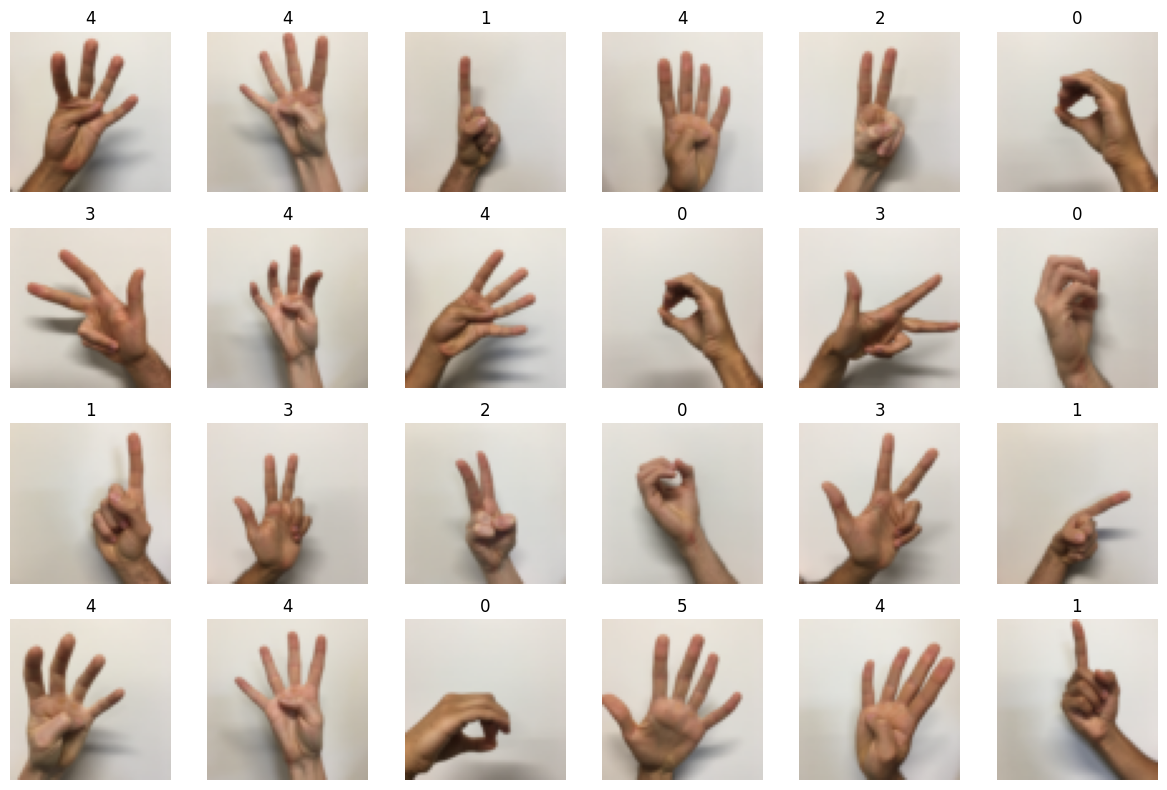

In [203]:
plt.figure(figsize=(12, 8))
display_samples_in_grid(X_train, n_rows=4, n_cols=6, y=Y_train)
plt.tight_layout(h_pad=1, w_pad=1)

## Data processing

In [204]:
dimData = np.prod(X_train.shape[1:])
dimData

12288

In [205]:
# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Scale the data to lie between 0 to 1
X_train /= 255
X_test /= 255

# Change the labels from integer to categorical data
Y_train_one_hot = to_categorical(Y_train)
Y_test_one_hot = to_categorical(Y_test)

# Display the change for category label using one-hot encoding
print('Original label [0] : ', Y_train[0])
print('After conversion to categorical ( one-hot ) : ', Y_train_one_hot[0])

Original label [0] :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1.]


In [206]:
def Get_Graphic(history):
    # Plot the Loss Curves
    plt.figure(figsize=[8, 6])
    plt.plot(history.history['loss'], 'r', linewidth=3.0)
    plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
    plt.legend(['Training loss', 'Testing Loss'], fontsize=18)
    plt.xlabel('Epochs ', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Loss Curves', fontsize=16)

    # Plot the Accuracy Curves
    plt.figure(figsize=[8, 6])
    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
    plt.legend(['Training Accuracy', 'Testing Accuracy'], fontsize=18)
    plt.xlabel('Epochs ', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title('Accuracy Curves', fontsize=16)

## Creating the model

In [207]:
def Creating_and_training_a_model(Several_hidden_layers, activations, dropout = None):
    model = Sequential()

    model.add(Flatten(input_shape=(X_train.shape[1:])))
    
    for _ in range(Several_hidden_layers):
        model.add(Dense(512, activation=activations))
    
    if dropout != None:
        model.add(Dropout(dropout))
        
    model.add(Dense(len(classes), activation='softmax'))

    # Configure the model
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, Y_train_one_hot, batch_size=32, epochs=40, verbose=1, validation_data=(X_test, Y_test_one_hot))
    
    # Evaluate the trained model
    [test_loss, test_acc] = model.evaluate(X_test, Y_test_one_hot)
    print("Evaluate:\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
    
    Get_Graphic(history)

Epoch 1/40
34/34 [==============================] - 3s 77ms/step - loss: 6.6598 - accuracy: 0.1583 - val_loss: 2.3609 - val_accuracy: 0.2333
Epoch 2/40
34/34 [==============================] - 2s 72ms/step - loss: 1.9130 - accuracy: 0.2148 - val_loss: 1.9358 - val_accuracy: 0.1667
Epoch 3/40
34/34 [==============================] - 2s 68ms/step - loss: 1.7159 - accuracy: 0.2917 - val_loss: 1.5957 - val_accuracy: 0.3250
Epoch 4/40
34/34 [==============================] - 2s 67ms/step - loss: 1.4807 - accuracy: 0.4037 - val_loss: 1.3627 - val_accuracy: 0.4500
Epoch 5/40
34/34 [==============================] - 2s 67ms/step - loss: 1.3362 - accuracy: 0.4907 - val_loss: 1.2204 - val_accuracy: 0.5833
Epoch 6/40
34/34 [==============================] - 2s 67ms/step - loss: 1.2001 - accuracy: 0.5463 - val_loss: 1.3084 - val_accuracy: 0.4750
Epoch 7/40
34/34 [==============================] - 3s 75ms/step - loss: 1.2363 - accuracy: 0.5046 - val_loss: 1.1359 - val_accuracy: 0.5250
Epoch 8/40
34

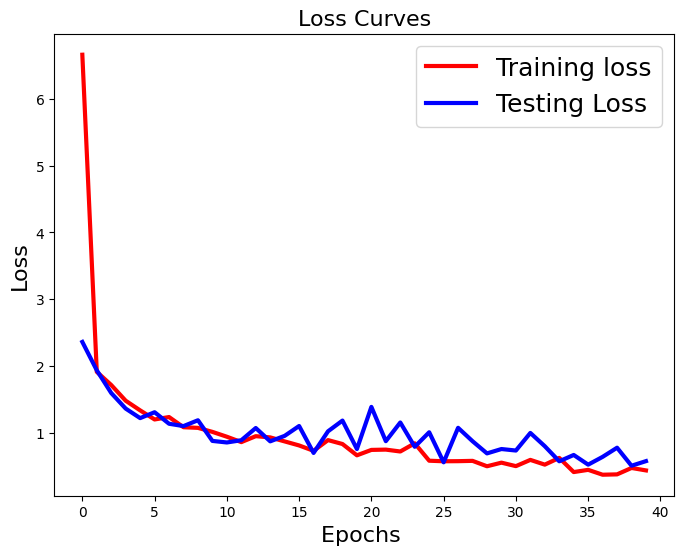

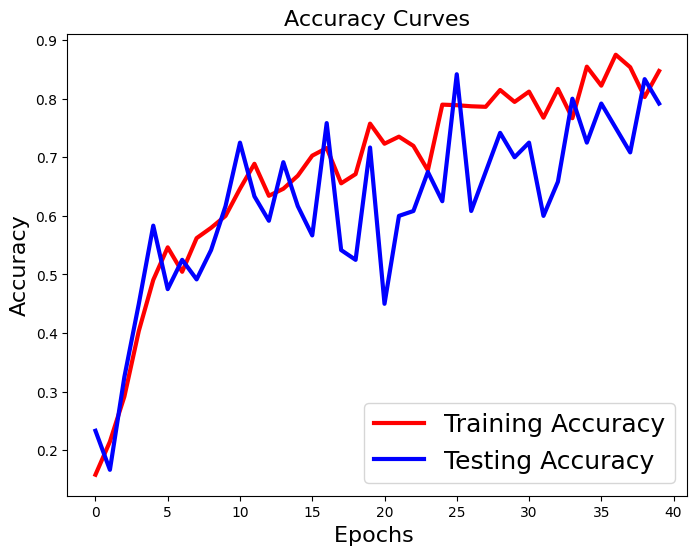

In [208]:
Creating_and_training_a_model(Several_hidden_layers = 2, activations = 'relu')

### Add a hidden layer

Epoch 1/40
34/34 [==============================] - 5s 92ms/step - loss: 3.5924 - accuracy: 0.1694 - val_loss: 1.8587 - val_accuracy: 0.1667
Epoch 2/40
34/34 [==============================] - 3s 82ms/step - loss: 1.8400 - accuracy: 0.1944 - val_loss: 1.8286 - val_accuracy: 0.1667
Epoch 3/40
34/34 [==============================] - 3s 87ms/step - loss: 1.7346 - accuracy: 0.2639 - val_loss: 1.5820 - val_accuracy: 0.3833
Epoch 4/40
34/34 [==============================] - 3s 83ms/step - loss: 1.6377 - accuracy: 0.3333 - val_loss: 1.4810 - val_accuracy: 0.4917
Epoch 5/40
34/34 [==============================] - 3s 83ms/step - loss: 1.4800 - accuracy: 0.3880 - val_loss: 1.6236 - val_accuracy: 0.3083
Epoch 6/40
34/34 [==============================] - 3s 86ms/step - loss: 1.3815 - accuracy: 0.4296 - val_loss: 1.4433 - val_accuracy: 0.3833
Epoch 7/40
34/34 [==============================] - 3s 80ms/step - loss: 1.2583 - accuracy: 0.4806 - val_loss: 1.2298 - val_accuracy: 0.4583
Epoch 8/40
34

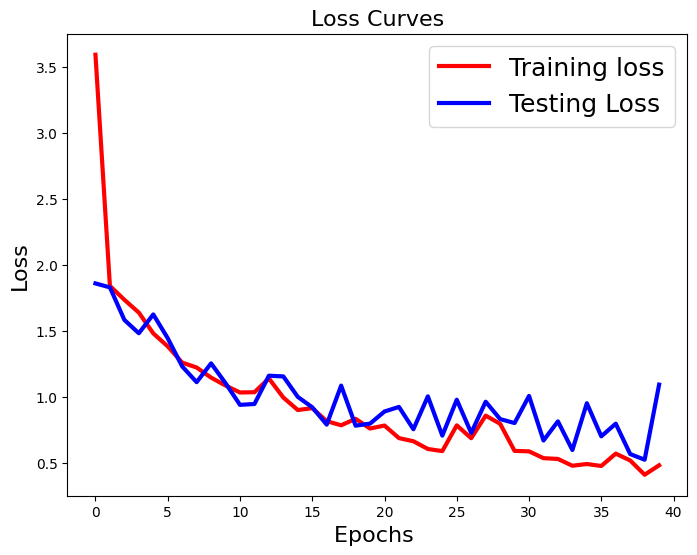

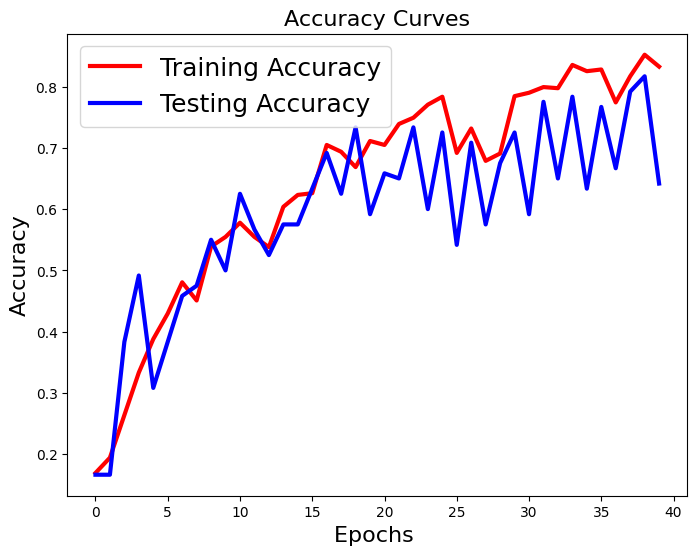

In [209]:
Creating_and_training_a_model(Several_hidden_layers=4, activations='relu')

### Change the activation to tanh

Epoch 1/40
34/34 [==============================] - 4s 81ms/step - loss: 2.2788 - accuracy: 0.1815 - val_loss: 1.9025 - val_accuracy: 0.1667
Epoch 2/40
34/34 [==============================] - 2s 68ms/step - loss: 1.8537 - accuracy: 0.1667 - val_loss: 1.8629 - val_accuracy: 0.1667
Epoch 3/40
34/34 [==============================] - 2s 67ms/step - loss: 1.8458 - accuracy: 0.1509 - val_loss: 1.8410 - val_accuracy: 0.1667
Epoch 4/40
34/34 [==============================] - 3s 76ms/step - loss: 1.8402 - accuracy: 0.1491 - val_loss: 1.8066 - val_accuracy: 0.1667
Epoch 5/40
34/34 [==============================] - 2s 70ms/step - loss: 1.8228 - accuracy: 0.1472 - val_loss: 1.8180 - val_accuracy: 0.1667
Epoch 6/40
34/34 [==============================] - 2s 69ms/step - loss: 1.8355 - accuracy: 0.1602 - val_loss: 1.8327 - val_accuracy: 0.1667
Epoch 7/40
34/34 [==============================] - 2s 69ms/step - loss: 1.8530 - accuracy: 0.1556 - val_loss: 1.8298 - val_accuracy: 0.1667
Epoch 8/40
34

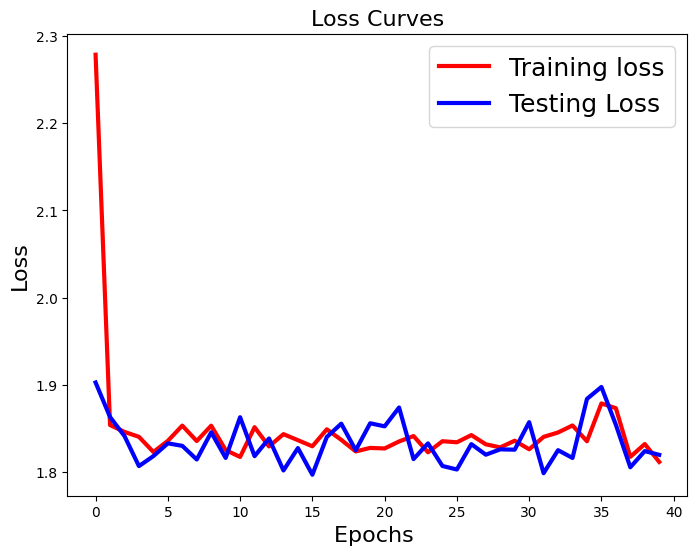

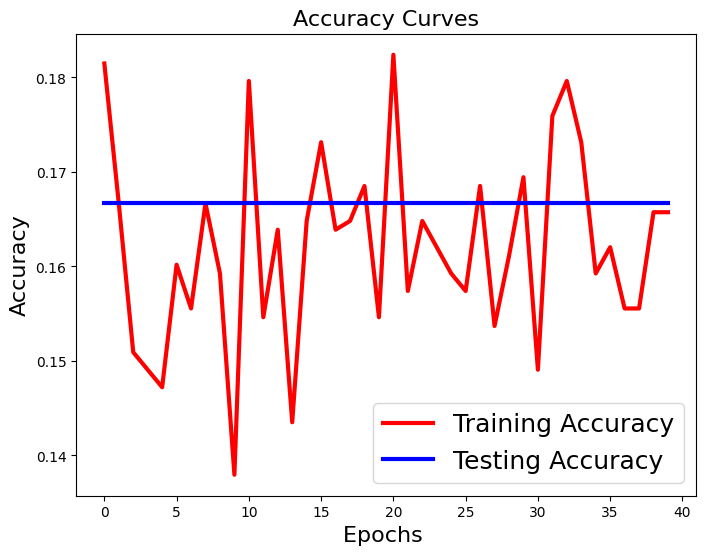

In [210]:
Creating_and_training_a_model(Several_hidden_layers=3, activations='tanh')

### Change the dropout ratio

Epoch 1/40
34/34 [==============================] - 3s 71ms/step - loss: 4.0481 - accuracy: 0.1565 - val_loss: 1.8130 - val_accuracy: 0.2000
Epoch 2/40
34/34 [==============================] - 2s 65ms/step - loss: 1.8160 - accuracy: 0.1944 - val_loss: 1.7567 - val_accuracy: 0.1833
Epoch 3/40
34/34 [==============================] - 2s 64ms/step - loss: 1.7002 - accuracy: 0.2852 - val_loss: 1.6045 - val_accuracy: 0.2833
Epoch 4/40
34/34 [==============================] - 2s 64ms/step - loss: 1.5713 - accuracy: 0.3519 - val_loss: 1.4489 - val_accuracy: 0.4167
Epoch 5/40
34/34 [==============================] - 2s 64ms/step - loss: 1.4618 - accuracy: 0.3556 - val_loss: 1.5404 - val_accuracy: 0.2750
Epoch 6/40
34/34 [==============================] - 2s 64ms/step - loss: 1.5139 - accuracy: 0.3741 - val_loss: 1.3378 - val_accuracy: 0.4000
Epoch 7/40
34/34 [==============================] - 2s 66ms/step - loss: 1.3628 - accuracy: 0.4139 - val_loss: 1.3136 - val_accuracy: 0.4750
Epoch 8/40
34

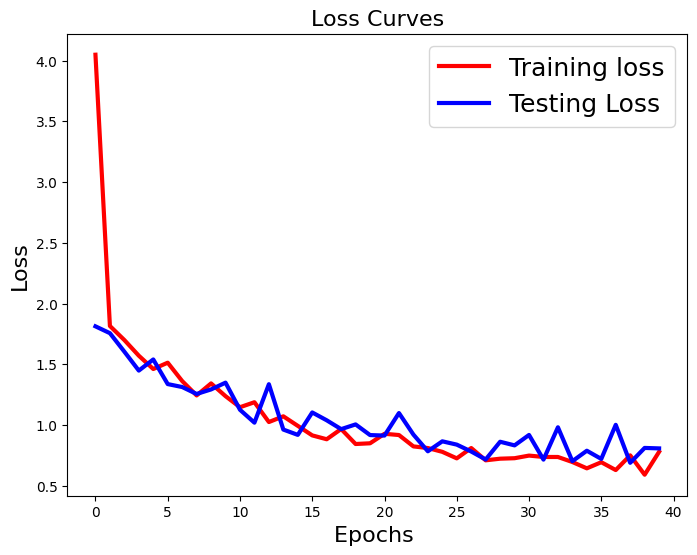

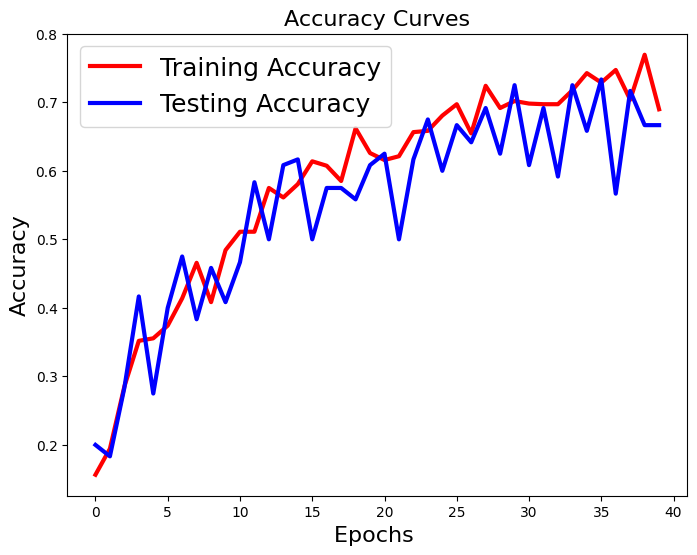

In [211]:
Creating_and_training_a_model(Several_hidden_layers=3, activations='relu', dropout = 0.25)